In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


In [21]:

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
print(df.head())
print(df.nunique())
print(df.corr())
print(df.target)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
target                3
dtype: int64
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width 

In [22]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(y_test.shape)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print('\n\n')
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
(30,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0



[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#Diabetes

In [23]:
f = pd.read_csv('diabetes.csv')
print(f.shape)
print(f.head())
print(f.nunique())
print(f.corr())

(768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0        1  
1                       NaN  31.0        0  
2                       NaN  32.0        1  
3                     0.167  21.0        0  
4                     2.288  33.0        1  
Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                50
Insulin                     186
BMI                         242
DiabetesPedigreeFunction    502
Age                          52
Outcome                       2


In [24]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               762 non-null    float64
 1   Glucose                   751 non-null    float64
 2   BloodPressure             751 non-null    float64
 3   SkinThickness             753 non-null    float64
 4   Insulin                   765 non-null    float64
 5   BMI                       739 non-null    float64
 6   DiabetesPedigreeFunction  739 non-null    float64
 7   Age                       766 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [25]:
f.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.125368,0.131907,-0.081070,-0.071010,0.013665,-0.031342,0.542296,0.218790
Glucose,0.125368,1.000000,0.150814,0.060826,0.340419,0.218785,0.110840,0.263042,0.463956
BloodPressure,0.131907,0.150814,1.000000,0.216625,0.091784,0.286941,0.048346,0.238915,0.063016
SkinThickness,-0.081070,0.060826,0.216625,1.000000,0.441302,0.374018,0.171855,-0.117392,0.073720
Insulin,-0.071010,0.340419,0.091784,0.441302,1.000000,0.187932,0.152061,-0.044001,0.132064
BMI,0.013665,0.218785,0.286941,0.374018,0.187932,1.000000,0.159772,0.043459,0.293891
DiabetesPedigreeFunction,-0.031342,0.110840,0.048346,0.171855,0.152061,0.159772,1.000000,0.032178,0.181258
Age,0.542296,0.263042,0.238915,-0.117392,-0.044001,0.043459,0.032178,1.000000,0.237752
Outcome,0.218790,0.463956,0.063016,0.073720,0.132064,0.293891,0.181258,0.237752,1.000000


<Axes: >

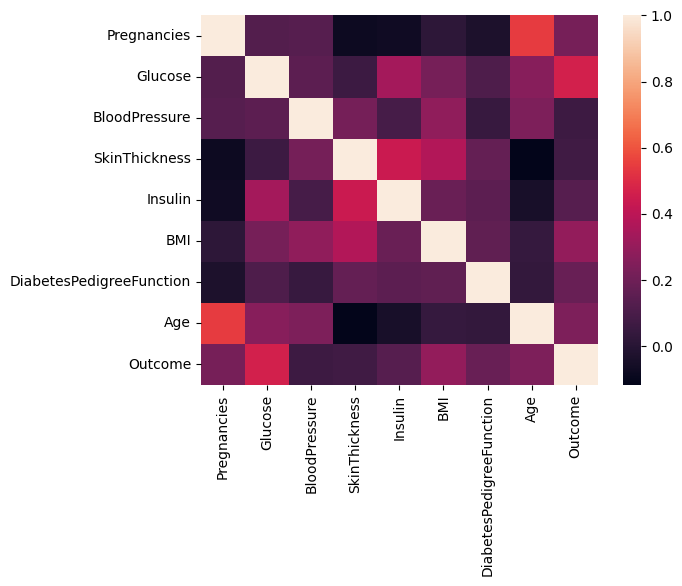

In [26]:
sns.heatmap(f.corr())

In [28]:
df = f.fillna(method = 'ffill', axis=0)

In [ ]:
# EDA
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred)*100)

print('\n\n')

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(y_test.shape)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred)*100)

In [29]:

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# model = LogisticRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred)*100)

print('\n\n')

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(y_test.shape)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred)*100)

ValueError: Found input variables with inconsistent numbers of samples: [154, 30]

In [ ]:
# Drop the 'Insulin' column
df_dropped = df.drop('Insulin', axis=1)

X_dropped = df_dropped.drop('Outcome', axis=1)
y_dropped = df_dropped['Outcome']

X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split(X_dropped, y_dropped, test_size=0.2, random_state=42)

scaler_dropped = StandardScaler()
X_train_scaled_dropped = scaler_dropped.fit_transform(X_train_dropped)
X_test_scaled_dropped = scaler_dropped.transform(X_test_dropped)

knn_dropped = KNeighborsClassifier(n_neighbors=3)
knn_dropped.fit(X_train_scaled_dropped, y_train_dropped)
y_pred_dropped = knn_dropped.predict(X_test_scaled_dropped)

print("Results after dropping 'Insulin' column:")
print(confusion_matrix(y_test_dropped, y_pred_dropped))
print(classification_report(y_test_dropped, y_pred_dropped))
print(accuracy_score(y_test_dropped, y_pred_dropped) * 100)

#Random Forest

In [ ]:
c = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=0)
print(c.fit(X_train, y_train))